In [83]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import sys

sys.path.append('..')
from analysis_helper_functions import *

In [96]:
from pathlib import Path
import matplotlib as mpl
import matplotlib.pyplot as plt

fpath = Path(mpl.get_data_path(), "fonts/ttf/NotoSansSC-Regular.ttf")

def plot_count_vs_sentiment(sentiment_df: pd.DataFrame, 
                            articles_df: pd.DataFrame, 
                            term: str, 
                            title: str, 
                            standardize=False, 
                            best_fit=False, 
                            legend_loc='best') -> None:
    """Plots the sentiment of the term against the frequency of use"""

    quarter_counts = quarter_count(articles_df, term, standardize)

    frequency_df = pd.DataFrame({"year_quarter": quarter_counts.keys(), "count": quarter_counts.values()})

    combined_df = pd.merge(frequency_df, sentiment_df, on="year_quarter")

    fig, ax1 = plt.subplots()

    xvals = list(combined_df["year_quarter"])
    count = list(combined_df["count"])
    positive_sent = list(combined_df["positive"])
    negative_sent = list(combined_df["negative"])
    
    # count y-axis
    ax1_color = "tab:blue"
    ax1.plot(xvals, count, color=ax1_color)
    ax1.set_ylabel("Term Count", color=ax1_color)
    ax1.set_ylim([0, None])

    if best_fit:
        count_best_fit = get_best_fit_values(combined_df, 'count')
        ax1.plot(xvals, count_best_fit, color="tab:orange", label="Best Fit")

    # sentiment y-axis
    ax2 = ax1.twinx()
    # positive sentiment
    ax2.plot(xvals, positive_sent, label="Positive Sent.", color="tab:green")
    # negative sentiment
    ax2.plot(xvals, negative_sent, label="Negative Sent.", color="tab:red")
    ax2.set_ylabel("Sentiment")
    # ax2.set_ylim([0, 1])

    # create common legend
    # Get the handles and labels of both axes
    handles1, labels1 = ax1.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()

    # Combine the handles and labels
    handles = handles1 + handles2
    labels = labels1 + labels2

    # Create the legend
    plt.legend(handles, labels, loc=legend_loc)

    # common x axis
    ax1.set_xlabel("Quarter")
    ax1.tick_params(axis='x', rotation=50)
    ax1.set_title(title, font=fpath)
    ax1.tick_params(axis='x', rotation=50)
    ax1.grid()

    plt.savefig(f"/Users/calebharding/Documents/BYU/2023-2024/China_Project/reports/visuals/mixed_analysis/{title}.png", bbox_inches="tight")
    
    plt.show()

    return combined_df

def plot_count_vs_econ_data(econ_data_df, 
                            articles_df, 
                            term, 
                            title,
                            standardize=False, 
                            lag=0):
    
    quarter_counts = quarter_count(articles_df, term, standardize)

    frequency_df = pd.DataFrame({"year_quarter": quarter_counts.keys(), "count": quarter_counts.values()})

    combined_df = pd.merge(frequency_df, econ_data_df, on="year_quarter")
    combined_df["quarter_gdp_growth"] = combined_df["quarter_gdp_growth"].shift(lag)

    fig, ax1 = plt.subplots()

    xvals = list(combined_df["year_quarter"])
    count = list(combined_df["count"])
    econ_data = list(combined_df["quarter_gdp_growth"])

    # count y-axis
    ax1_color = "tab:blue"
    ax1.plot(xvals, count, color=ax1_color)
    ax1.set_ylabel("\"Economy\" Instance Count", color=ax1_color)
    # ax1.set_ylim([0, None])

    # gdp y-axis
    ax2_color = "tab:orange"
    ax2 = ax1.twinx()
    ax2.plot(xvals, econ_data, color=ax2_color)
    ax2.set_ylabel("Quarterly GDP Growth (percent)", color=ax2_color)
    # ax2.set_ylim([0, 1])

    # common x axis
    ax1.set_xlabel("Quarter")
    ax1.tick_params(axis='x', rotation=50)
    ax1.set_title(title)
    ax1.tick_params(axis='x', rotation=50)
    ax1.grid()

    # add a text box with the correlation 
    add_correlation_box(combined_df["count"], combined_df["quarter_gdp_growth"], ax1)

    # correlation = round(combined_df["count"].corr(combined_df["quarter_gdp_growth"].shift(-1)), 2)

    # text_box = AnchoredText(f"corr = {correlation}", frameon=True, loc='lower right', pad=0.5)
    # plt.setp(text_box.patch, facecolor='white', alpha=0.5)
    # ax1.add_artist(text_box)

    plt.savefig(f"/Users/calebharding/Documents/BYU/2023-2024/China_Project/reports/visuals/mixed_analysis/{title}.png", bbox_inches="tight")
    plt.show()

    return combined_df


In [97]:
qiushi_articles = pd.read_csv("../../process_articles/process_qiushi_articles/validated_qiushi_articles.csv")
asx_articles = pd.read_csv("../../process_articles/process_asx_articles/validated_asx_articles.csv")

## Sentiment and Frequency

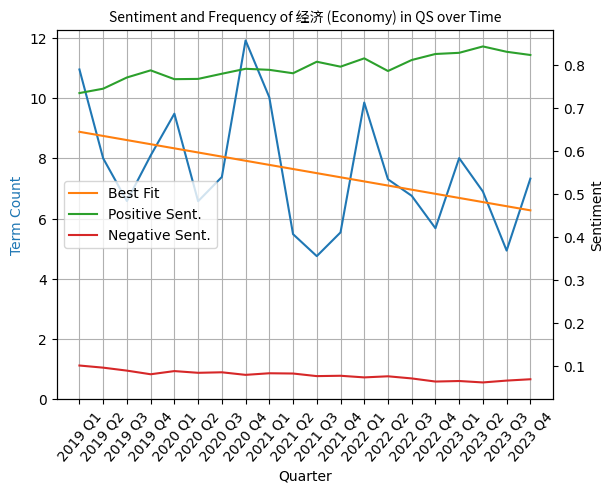

,year_quarter,count,positive,neutral,negative
0,2019 Q1,10.952381,0.734922,0.162920,0.102158
1,2019 Q2,8.000000,0.745089,0.157708,0.097202
2,2019 Q3,6.582418,0.771125,0.138565,0.090310
3,2019 Q4,8.094340,0.787667,0.130465,0.081867
4,2020 Q1,9.483871,0.767184,0.143585,0.089231
5,2020 Q2,6.576471,0.767804,0.146951,0.085245
6,2020 Q3,7.381818,0.779767,0.133794,0.086439
7,2020 Q4,11.917526,0.791292,0.128244,0.080464
8,2021 Q1,10.028571,0.788863,0.126946,0.084191
9,2021 Q2,5.483146,0.780917,0.135495,0.083588


In [98]:
qs_econ_sent = pd.read_csv('/Users/calebharding/Documents/BYU/2023-2024/China_Project/articles/analyze_articles/sentiment_analysis/aggregated_sentiments/QS_经济.csv')

plot_count_vs_sentiment(qs_econ_sent, qiushi_articles, '经济', "Sentiment and Frequency of 经济 (Economy) in QS over Time", standardize=True, best_fit=True, legend_loc='center left')

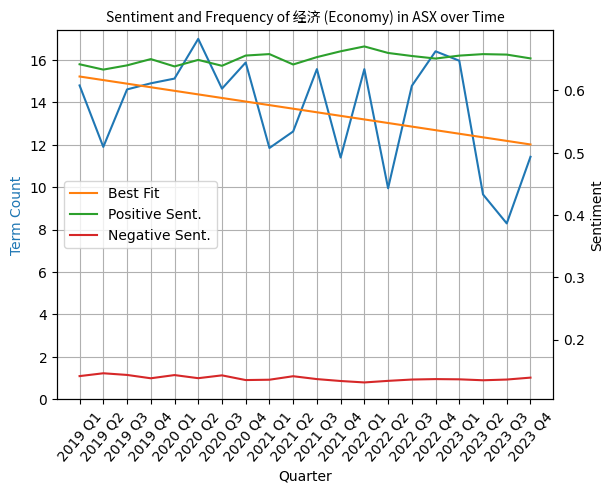

,year_quarter,count,positive,neutral,negative
0,2019 Q1,14.793165,0.641877,0.216846,0.141277
1,2019 Q2,11.894459,0.633326,0.220844,0.145830
2,2019 Q3,14.605396,0.640129,0.216712,0.143159
3,2019 Q4,14.892694,0.650189,0.212025,0.137786
4,2020 Q1,15.115979,0.638441,0.218623,0.142936
5,2020 Q2,16.988304,0.648889,0.213180,0.137931
6,2020 Q3,14.640244,0.639453,0.218070,0.142477
7,2020 Q4,15.873156,0.655880,0.209186,0.134933
8,2021 Q1,11.843869,0.658219,0.206307,0.135474
9,2021 Q2,12.623611,0.641540,0.217370,0.141091


In [99]:
asx_econ_sent = pd.read_csv('/Users/calebharding/Documents/BYU/2023-2024/China_Project/articles/analyze_articles/sentiment_analysis/aggregated_sentiments/ASX_经济.csv')

plot_count_vs_sentiment(asx_econ_sent, asx_articles, '经济', "Sentiment and Frequency of 经济 (Economy) in ASX over Time", standardize=True, best_fit=True, legend_loc='center left')

## Economic Growth and Frequency

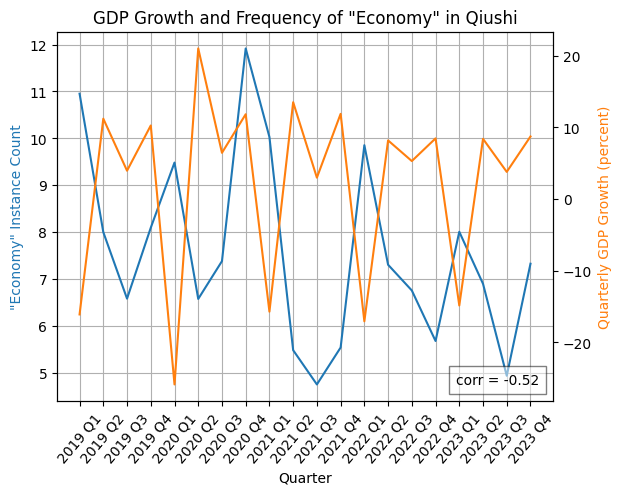

In [100]:
econ_data = pd.read_csv("/Users/calebharding/Documents/BYU/2023-2024/China_Project/articles/analyze_articles/economic_data_analysis/economic_data/processed_quarterly_data.csv")

qs_econ = plot_count_vs_econ_data(econ_data, qiushi_articles, '经济', "GDP Growth and Frequency of \"Economy\" in Qiushi", standardize=True, lag=0)

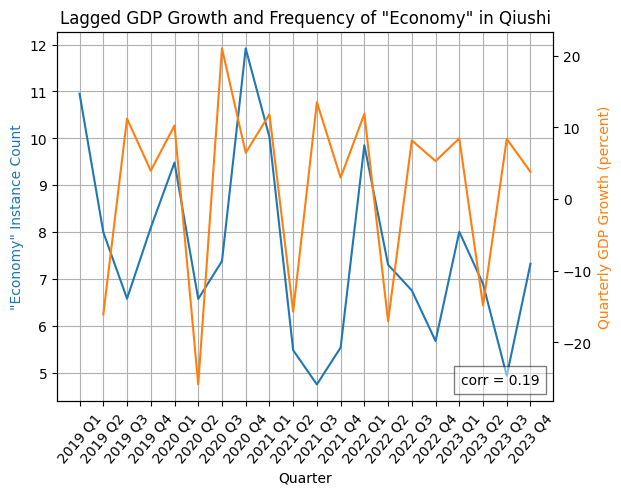

In [101]:
econ_data = pd.read_csv("/Users/calebharding/Documents/BYU/2023-2024/China_Project/articles/analyze_articles/economic_data_analysis/economic_data/processed_quarterly_data.csv")

qs_econ_lag = plot_count_vs_econ_data(econ_data, qiushi_articles, '经济', "Lagged GDP Growth and Frequency of \"Economy\" in Qiushi", standardize=True, lag=1)


In [106]:
qs_econ_lag = add_quarter(qs_econ_lag)

qs_econ_lag_reg = HAC_regression_w_controls(qs_econ_lag, 
                                            ['count ~ quarter_gdp_growth', 'count ~ quarter_gdp_growth + C(quarter)'], 
                                            ["Economy Count", "Economy Count"])

qs_econ_lag_reg.to_excel('./regression_results/qs_economic_data.xlsx')
qs_econ_lag_reg

,Economy Count I,Economy Count II
Intercept,7.35***,7.97***
,(0.38),(0.60)
C(quarter)[T.2],,1.20
,,(1.52)
C(quarter)[T.3],,-3.50***
,,(0.60)
C(quarter)[T.4],,-0.84
,,(1.11)
quarter_gdp_growth,0.03,0.13**
,(0.02),(0.05)


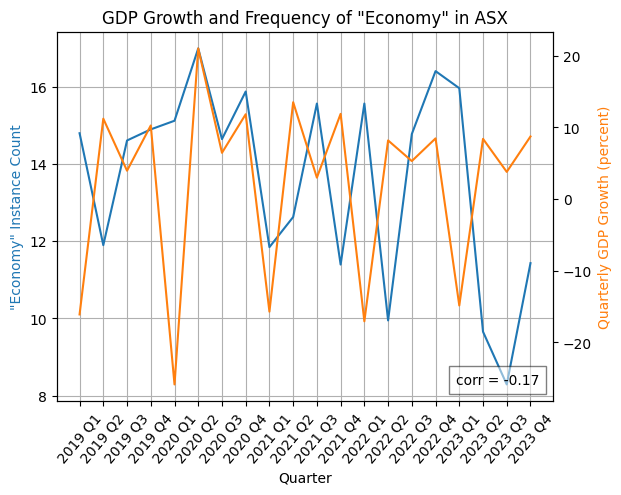

In [103]:
econ_data = pd.read_csv("/Users/calebharding/Documents/BYU/2023-2024/China_Project/articles/analyze_articles/economic_data_analysis/economic_data/processed_quarterly_data.csv")

asx_econ = plot_count_vs_econ_data(econ_data, asx_articles, '经济', "GDP Growth and Frequency of \"Economy\" in ASX", standardize=True)

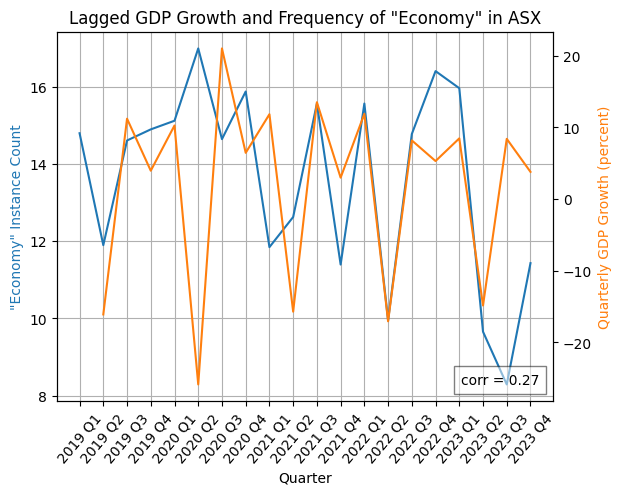

In [104]:
econ_data = pd.read_csv("/Users/calebharding/Documents/BYU/2023-2024/China_Project/articles/analyze_articles/economic_data_analysis/economic_data/processed_quarterly_data.csv")

asx_econ_lag = plot_count_vs_econ_data(econ_data, asx_articles, '经济', "Lagged GDP Growth and Frequency of \"Economy\" in ASX", standardize=True, lag=1)

In [107]:
asx_econ_lag = add_quarter(asx_econ_lag)

asx_econ_lag_reg = HAC_regression_w_controls(asx_econ_lag, 
                                            ['count ~ quarter_gdp_growth', 'count ~ quarter_gdp_growth + C(quarter)'], 
                                            ["Economy Count", "Economy Count"])

asx_econ_lag_reg.to_excel('./regression_results/asx_economic_data.xlsx')
asx_econ_lag_reg

,Economy Count I,Economy Count II
Intercept,13.45***,15.41***
,(0.68),(2.00)
C(quarter)[T.2],,-4.54
,,(4.28)
C(quarter)[T.3],,-0.91
,,(1.73)
C(quarter)[T.4],,-1.08
,,(1.52)
quarter_gdp_growth,0.05,-0.07
,(0.05),(0.16)
